<a href="https://www.kaggle.com/madhuri15/iris-flower-classifier?scriptVersionId=88446079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
y = pd.Series(iris_dataset['target'], name='target')

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = y.replace({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [5]:
print('X Shape: ', X.shape)
print('y Shape: ', y.shape)

X Shape:  (150, 4)
y Shape:  (150,)


In [6]:
## Description
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
## Summary
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


We can see that there are no null values present in dataset.

### Outliers

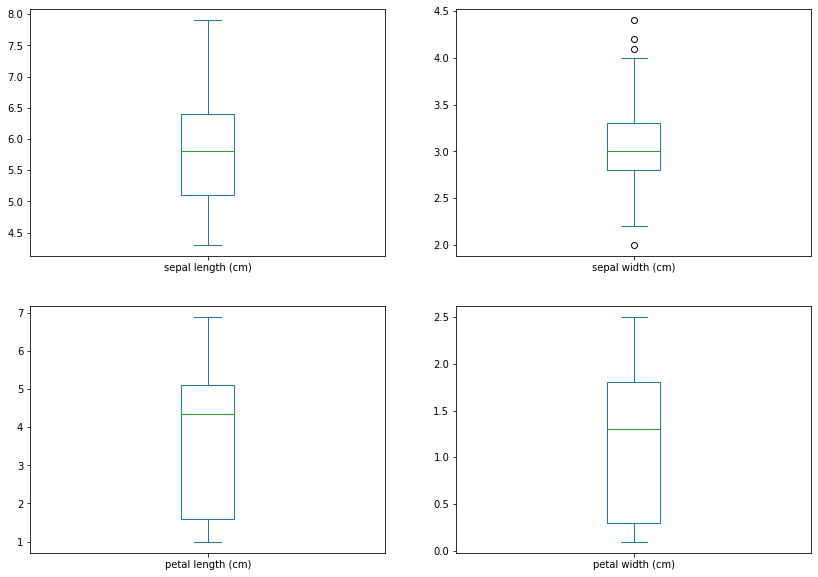

In [8]:
fig, ax = plt.subplots(2, 2,figsize=(14, 10))

ax1 = X['sepal length (cm)'].plot(kind='box', ax=ax[0][0])
ax2 = X['sepal width (cm)'].plot(kind='box', ax=ax[0][1])
ax3 = X['petal length (cm)'].plot(kind='box', ax=ax[1][0])
ax4 = X['petal width (cm)'].plot(kind='box', ax=ax[1][1])
plt.show()

There are some outliers present in sepal width.

In [9]:
from scipy import stats

def remove_outlier(data, col):
    
    # calculate 1st and 3rd quantiles.
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    
    # compute inter quantile range
    IQR = stats.iqr(data[col], rng=(25, 75), interpolation='midpoint')
    
    upper_range= Q3 + (IQR * 1.5)
    lower_range= Q1 - (IQR * 1.5)
    
    # replacing outliers
    data[col] = np.where(data[col] > upper_range, upper_range, data[col])
    data[col] = np.where(data[col] < lower_range, lower_range, data[col])
    
remove_outlier(X, 'sepal width (cm)')

## Univariate Analysis

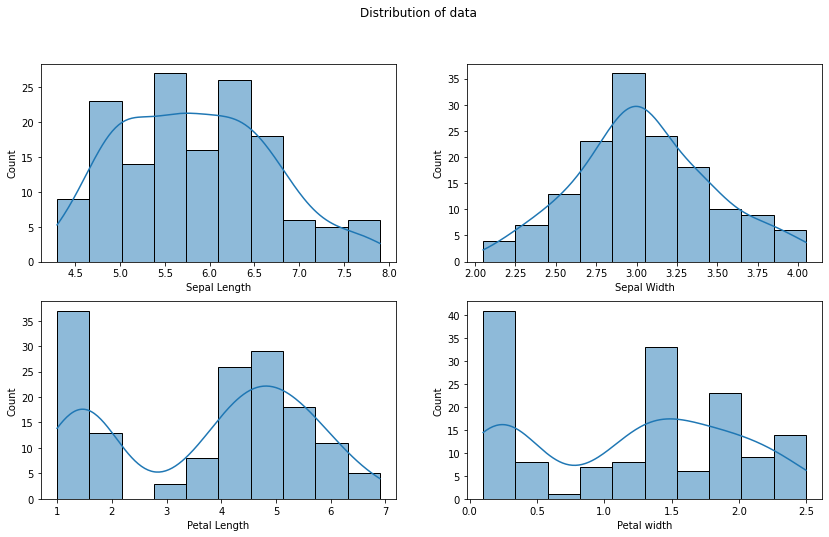

In [10]:
nbins = 10
fig, ax=plt.subplots(2, 2, figsize=(14, 8))

ax0=sns.histplot(data=X, x='sepal length (cm)', ax=ax[0, 0], kde=True, bins=nbins)
ax0.set_xlabel("Sepal Length")

ax1=sns.histplot(data=X, x='sepal width (cm)',  ax=ax[0, 1], kde=True, bins=nbins)
ax1.set_xlabel("Sepal Width")

ax2=sns.histplot(data=X, x='petal length (cm)', ax=ax[1, 0], kde=True, bins=nbins)
ax2.set_xlabel("Petal Length")

ax3=sns.histplot(data=X, x='petal width (cm)',  ax=ax[1, 1], kde=True, bins=nbins)
ax3.set_xlabel("Petal width")

fig.suptitle("Distribution of data")
plt.show()

Distribution of Sepal length shows slight right skewed data, For both Petal length and Petal width shows groups of data points, where each groups have their own distribution with values smaller than others.

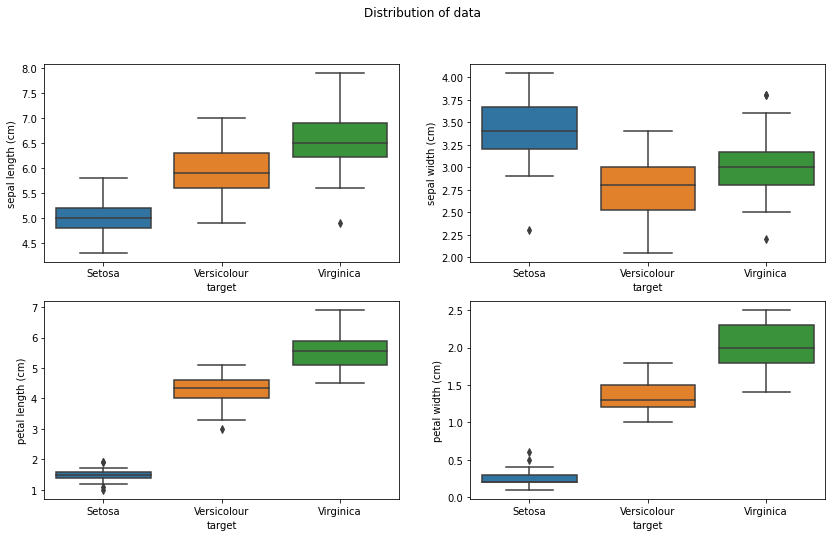

In [11]:
# Sepal_length
fig, ax=plt.subplots(2, 2, figsize=(14, 8))

ax0=sns.boxplot(data=X, y='sepal length (cm)',x=y, ax=ax[0, 0])
ax1=sns.boxplot(data=X, y='sepal width (cm)', x=y, ax=ax[0, 1], )
ax2=sns.boxplot(data=X, y='petal length (cm)',x=y, ax=ax[1, 0], )
ax3=sns.boxplot(data=X, y='petal width (cm)', x=y, ax=ax[1, 1],)

fig.suptitle("Distribution of data")
plt.show()

Boxplot shows that, Setosa has smaller values for both Petal length and Petal width, while comparing other two species, the Versicolor has smaller Petal length and width than Virginica iris flowers. But Sepal width is larger for Setosa as compare to two other species.

## **Correlation**

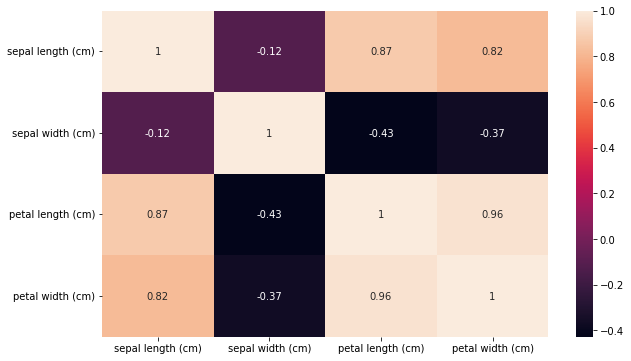

In [12]:
corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

Petal Length and Petal width are higly correlated to each other. Sepal length also show high correlation with both Petal length and Petal width while Sepal width does not show strong correlation.

In [13]:
## Let's split data into training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("Train Dataset")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print("-"*10)
print("Test Dataset")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Train Dataset
X_train shape: (112, 4)
y_train shape: (112,)
----------
Test Dataset
X_test shape: (38, 4)
y_test shape: (38,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Create an knn object
knn = KNeighborsClassifier(n_neighbors=3)

## fit the model
knn.fit(X_train, y_train)

## predict model
y_preds = knn.predict(X_test)

## accuracy
print("Accuracy: ", np.mean(y_preds == y_test))

Accuracy:  0.9736842105263158
